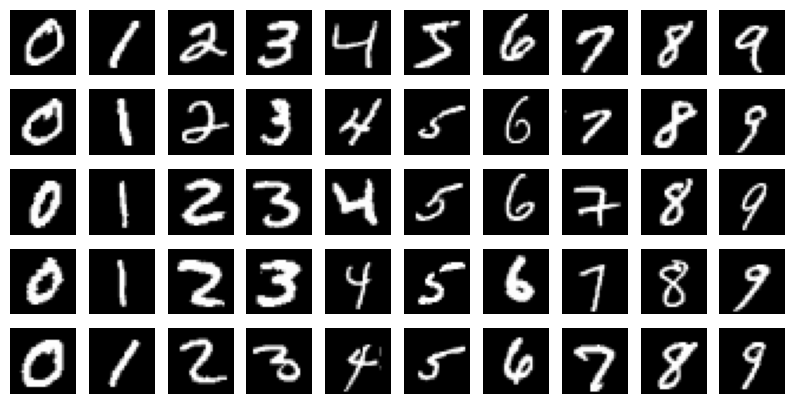

In [5]:
import torch 
from dataset import get_mnist
import matplotlib.pyplot as plt
import numpy as np


trainset, testset = get_mnist("./data")
mnist_full = torch.utils.data.ConcatDataset([trainset, testset])

def display_samples(dataset):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        # Get indices of samples for the current digit
        indices = []
        for j in range(len(dataset.datasets)):
            indices += (dataset.datasets[j].targets == i).nonzero().squeeze().tolist()
        # Plot first 5 samples of each digit
        for j in range(5):
            plt.subplot(5, 10, j*10+i+1)
            plt.imshow(dataset[indices[j]][0].numpy().squeeze(), cmap='gray')
            plt.axis('off')
    plt.show()

# Display sample images of each digit
display_samples(mnist_full)


In [ ]:
# Calculate class distribution
class_distribution = torch.zeros(10, dtype=torch.int)
for dataset in mnist_full.datasets:
    class_distribution += torch.bincount(dataset.targets, minlength=10)
# Plot class distribution
plt.bar(np.arange(10), class_distribution)
plt.xticks(np.arange(10), np.arange(10))
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.title('Class Distribution in MNIST Dataset')
plt.show()

In [56]:
import torchview
from model import MLP, SimpleCNN, LSTM, RNNModel
import os 
os.environ["PATH"] += os.pathsep + 'C:/Users/rohit/Desktop/windows_10_cmake_Release_Graphviz-10.0.1-win64/Graphviz-10.0.1-win64/bin'
model = SimpleCNN(num_classes=10)
graph = torchview.draw_graph(model, input_size=(20,1, 28, 28), graph_dir='LR')
import graphviz
graphviz.set_jupyter_format('png')
graph.visual_graph


(dot.exe:7012): Pango-WARNING **: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


In [41]:
from torchviz import make_dot
from torch.utils.data import DataLoader
model = MLP(num_classes=10)
model.to("cpu")
trainloader = DataLoader(
            trainset,batch_size=20, shuffle=True, num_workers=2)
images = None
for data in trainloader:
    images= data[0].to("cpu")
    break
torch.onnx.export(model, images, "mlp.onnx", verbose=False, 
                 input_names=["image"], output_names=["digit"],
                 export_params=True,)

In [47]:
model = RNNModel(num_classes=10)
# graph = torchview.draw_graph(model, input_size=(20, 1, 28, 28), depth=0)
# graph.visual_graph
model.to("cpu")
images = images.view(-1, 28, 28).requires_grad_().to("cpu")
# torch.onnx.export(model, images, "rnn.onnx", verbose=False, 
#                  input_names=["image"], output_names=["digit"],
#                  export_params=True,)
images.shape

torch.Size([20, 28, 28])